## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [4]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [5]:
df = pd.read_csv("students-data.csv",delimiter=';')
df.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
df.index.name = 'number'

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
df.select_dtypes(exclude=np.number).dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

In [8]:
df.select_dtypes(include=np.number).dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [9]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [11]:
num_df = df.select_dtypes(exclude=['object'])
num_df = num_df.loc[:, num_df.var()>1]

In [12]:
num_df.dtypes

age         int64
Medu        int64
Fedu        int64
goout       int64
Walc        int64
health      int64
absences    int64
G1          int64
G2          int64
G3          int64
dtype: object

In [13]:
enum_df = df.select_dtypes(include=['object'])
df = pd.concat([num_df, enum_df], axis=1)
df.dtypes

age            int64
Medu           int64
Fedu           int64
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [14]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.dtypes


age                  int64
Medu                 int64
Fedu                 int64
goout                int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_MS            uint8
sex_M                uint8
address_U            uint8
famsize_LE3          uint8
Pstatus_T            uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_home          uint8
reason_other         uint8
reason_reputation    uint8
guardian_mother      uint8
guardian_other       uint8
schoolsup_yes        uint8
famsup_yes           uint8
paid_yes             uint8
activities_yes       uint8
nursery_yes          uint8
higher_yes           uint8
internet_yes         uint8
romantic_yes         uint8
dtype: object

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [15]:
#pd.DataFrame(np.where(df >= 10, 1, 0), columns=df.columns)
dfd = df.loc[:,['G1','G2','G3']]
dfd
dfd = pd.DataFrame(np.where(dfd >= 10, 1, 0), columns=dfd.columns)
df = df.drop(['G1','G2','G3'], axis = 1) 
df

age  Medu  Fedu  goout  Walc  health  absences  school_MS  sex_M  \
number                                                                     
0        18     4     4      4     1       3         6          0      0   
1        17     1     1      3     1       3         4          0      0   
2        15     1     1      2     3       3        10          0      0   
3        15     4     2      2     1       5         2          0      0   
4        16     3     3      2     2       5         4          0      0   
...     ...   ...   ...    ...   ...     ...       ...        ...    ...   
390      20     2     2      4     5       4        11          1      1   
391      17     3     1      5     4       2         3          1      1   
392      21     1     1      3     3       3         3          1      1   
393      18     3     2      1     4       5         0          1      1   
394      19     1     1      3     3       5         5          1      1   

        address_U  ...  guardian_mother  guardian_other  schoolsup_yes  \
number             ...                                                   
0               1  ...                1               0              1   
1               1  ...                0               0              0   
2               1  ...                1               0              1   
3               1  ...                1               0              0   
4               1  ...                0               0              0   
...           ...  ...              ...             ...            ...   
390             1  ...                0               1              0   
391             1  ...                1               0              0   
392             0  ...                0               1              0   
393             0  ...                1               0              0   
394             1  ...                0               0              0   

        famsup_yes  paid_yes  activities_yes  nursery_yes  higher_yes  \
number                                                                  
0                0         0               0            1           1   
1                1         0               0            0           1   
2                0         1               0            1           1   
3                1         1               1            1           1   
4                1         1               0            1           1   
...            ...       ...             ...          ...         ...   
390              1         1               0            1           1   
391              0         0               0            0           1   
392              0         0               0            0           1   
393              0         0               0            0           1   
394              0         0               0            1           1   

        internet_yes  romantic_yes  
number                              
0                  0             0  
1                  1             0  
2                  1             0  
3                  1             1  
4                  0             0  
...              ...           ...  
390                0             0  
391                1             0  
392                0             0  
393                1             0  
394                1             0  

[395 rows x 33 columns]

In [16]:
df = pd.concat([df, dfd], axis=1)
df

age  Medu  Fedu  goout  Walc  health  absences  school_MS  sex_M  \
0     18     4     4      4     1       3         6          0      0   
1     17     1     1      3     1       3         4          0      0   
2     15     1     1      2     3       3        10          0      0   
3     15     4     2      2     1       5         2          0      0   
4     16     3     3      2     2       5         4          0      0   
..   ...   ...   ...    ...   ...     ...       ...        ...    ...   
390   20     2     2      4     5       4        11          1      1   
391   17     3     1      5     4       2         3          1      1   
392   21     1     1      3     3       3         3          1      1   
393   18     3     2      1     4       5         0          1      1   
394   19     1     1      3     3       5         5          1      1   

     address_U  ...  famsup_yes  paid_yes  activities_yes  nursery_yes  \
0            1  ...           0         0               0            1   
1            1  ...           1         0               0            0   
2            1  ...           0         1               0            1   
3            1  ...           1         1               1            1   
4            1  ...           1         1               0            1   
..         ...  ...         ...       ...             ...          ...   
390          1  ...           1         1               0            1   
391          1  ...           0         0               0            0   
392          0  ...           0         0               0            0   
393          0  ...           0         0               0            0   
394          1  ...           0         0               0            1   

     higher_yes  internet_yes  romantic_yes  G1  G2  G3  
0             1             0             0   0   0   0  
1             1             1             0   0   0   0  
2             1             1             0   0   0   1  
3             1             1             1   1   1   1  
4             1             0             0   0   1   1  
..          ...           ...           ...  ..  ..  ..  
390           1             0             0   0   0   0  
391           1             1             0   1   1   1  
392           1             0             0   1   0   0  
393           1             1             0   1   1   1  
394           1             1             0   0   0   0  

[395 rows x 36 columns]

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [14]:
X = df.drop(columns=['G3'])
y = df['G3'] 


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

Text(0, 0.5, 'G3')

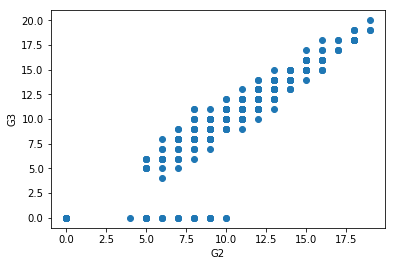

In [95]:
DFg23 = pd.read_csv("students-data.csv",delimiter=';')
dfg23 = DFg23.loc[:,['G2','G3']]
plt.scatter(dfg23['G2'],dfg23['G3'] )
plt.xlabel('G2')
plt.ylabel('G3')

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


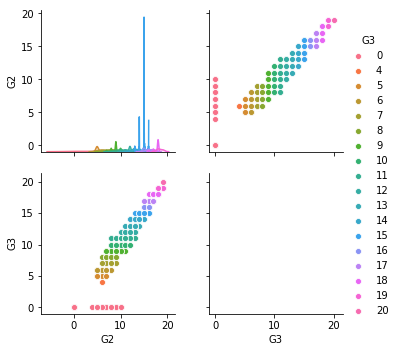

In [96]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfg23,hue ="G3")

The value of G3 increases as the value of G2 increases. There  is a linear relationship between these 2 parameters.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [27]:
DFg23.groupby('school')['age']

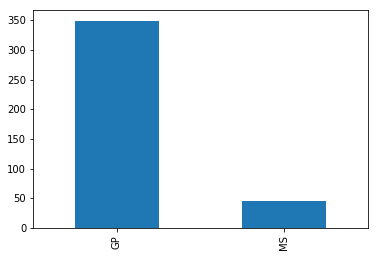

In [98]:
pd.value_counts(DFg23["school"]).plot(kind="bar")

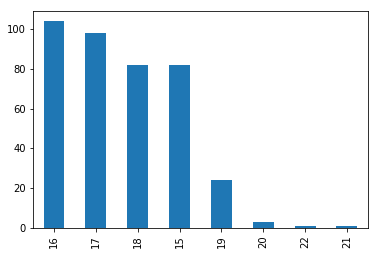

In [99]:
pd.value_counts(DFg23["age"]).plot(kind="bar")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [43]:
#As the shape of data frame is (395,36) therefore for keeping 300 records for training, 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2405, random_state=7)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [44]:
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics


model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9578947368421052
[[23  2]
 [ 2 68]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive bayes with Iris data

### Import Iris.csv

In [61]:
iris = pd.read_csv("iris.csv")

In [62]:
iris.head(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

In [63]:
iris.isnull().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

In [68]:
iris.drop(columns='Id',inplace = True)

In [69]:
iris.fillna(iris.mean(),inplace = True)

In [70]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [71]:
iris.groupby('Species')['SepalLengthCm'].describe()

count      mean       std  min    25%   50%  75%  max
Species                                                               
Iris-setosa       50.0  5.006000  0.352490  4.3  4.800  5.00  5.2  5.8
Iris-versicolor   50.0  5.936000  0.516171  4.9  5.600  5.90  6.3  7.0
Iris-virginica    52.0  6.560456  0.638636  4.9  6.175  6.45  6.9  7.9

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [29]:
X = iris.drop(columns='Species')
y = iris['Species']

### Find the distribution of target variable (Class)

In [72]:
pd.value_counts(iris["Species"])

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

In [73]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [74]:
sns.pairplot(iris, hue = 'Species')

via scatter plot matrix we can infer that - petal length and width is clearly higher for iri-setosa and is a good feature to classify them 

sepal - width does not clearly classify much. 

### Summary Statistics and explain insights for at least 2 variables

In [33]:
iris.groupby('Species')['PetalLengthCm'].describe()

count   mean       std  min  25%   50%    75%  max
Species                                                            
Iris-setosa       50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9
Iris-versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
Iris-virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

In [34]:
iris['PetalLengthCm'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [35]:
#25% of point typically have their petal length between 1.5 and 1.6 
#setosa has smaller petal length 

In [36]:
sns.boxplot(x="Species",y="PetalLengthCm", data=iris)
plt.show()


THis feature completely segregates the three categories, from all above data analysis wecan have the following few pounts as well

Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.

petal length and petal width are the most useful features to identify various flower types.

While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).

### Correlation among all variables and give your insights

In [75]:
iris.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109368       0.871741      0.816256
SepalWidthCm       -0.109368      1.000000      -0.420516     -0.355808
PetalLengthCm       0.871741     -0.420516       1.000000      0.960771
PetalWidthCm        0.816256     -0.355808       0.960771      1.000000

As the 
SepalLength increases - sepalWidth decreases, petalLength increases, and petalWidth also increases

SeapalWidth has a very weak negative correaltion with each feature. 

PetalLength and width have an extremely strong correlation with each other.

### Split data in Training and Validation in 80:20

In [85]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns='Species')
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(XIris, yIris, test_size=0.2, random_state=7)
X_train.isnull().any()
X_train.fillna(X_train.mean(),inplace= True)


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [90]:
X_test.fillna(X_test.mean(),inplace=True)
y_train.isnull().any()

False

### Do Feature Scaling

In [56]:
#As  it is a part of assignment hence performing scaling, but scaling doesn't matter in case of naive bayes algorithm
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
sc.fit(X_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(X_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [91]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [94]:
# make predictions
from sklearn import metrics
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.80      0.89        10
           3       0.87      1.00      0.93        13

   micro avg       0.94      0.94      0.94        31
   macro avg       0.96      0.93      0.94        31
weighted avg       0.94      0.94      0.93        31

[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 13]]


setosa can be very clearly seperated from the other 2 flowers as it has extremely distinguishing features and this is proven by extremely high precision and recall values 


However the other two flowers have overlapping characterstics and have slightly lesser precision and recall rates.